In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

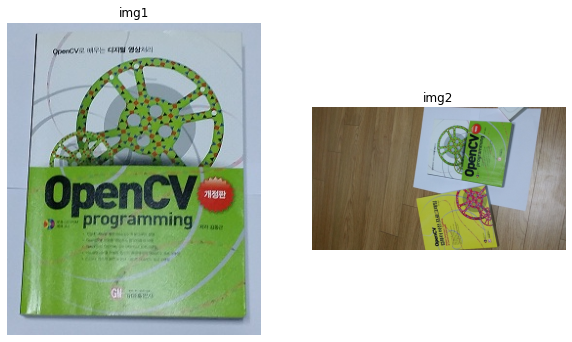

In [2]:
src1_bgr = cv2.imread('../data/book1.jpg')
src2_bgr = cv2.imread('../data/book2.jpg')
img1 = cv2.cvtColor(src1_bgr, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(src2_bgr, cv2.COLOR_BGR2GRAY)

src1_rgb = cv2.cvtColor(src1_bgr, cv2.COLOR_BGR2RGB)
src2_rgb = cv2.cvtColor(src2_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,30))
image = plt.subplot(1, 2, 1)
image.set_title('img1')
plt.axis('off')
plt.imshow(src1_rgb)
image = plt.subplot(1, 2, 2)
image.set_title('img2')
plt.axis('off')
plt.imshow(src2_rgb)

len(matches)= 1107
matches[0]=(queryIdx:342, trainIdx:486, distance:111.01351165771484)
matches[1]=(queryIdx:473, trainIdx:1333, distance:151.21507263183594)
matches[2]=(queryIdx:759, trainIdx:1625, distance:169.2187957763672)
matches[3]=(queryIdx:170, trainIdx:84, distance:199.20843505859375)
matches[4]=(queryIdx:392, trainIdx:358, distance:213.79196166992188)
matches[5]=(queryIdx:283, trainIdx:527, distance:241.03733825683594)
matches[6]=(queryIdx:928, trainIdx:1371, distance:263.58489990234375)
matches[7]=(queryIdx:940, trainIdx:1600, distance:276.9476623535156)
matches[8]=(queryIdx:975, trainIdx:1349, distance:289.4736633300781)
matches[9]=(queryIdx:550, trainIdx:235, distance:297.0774230957031)


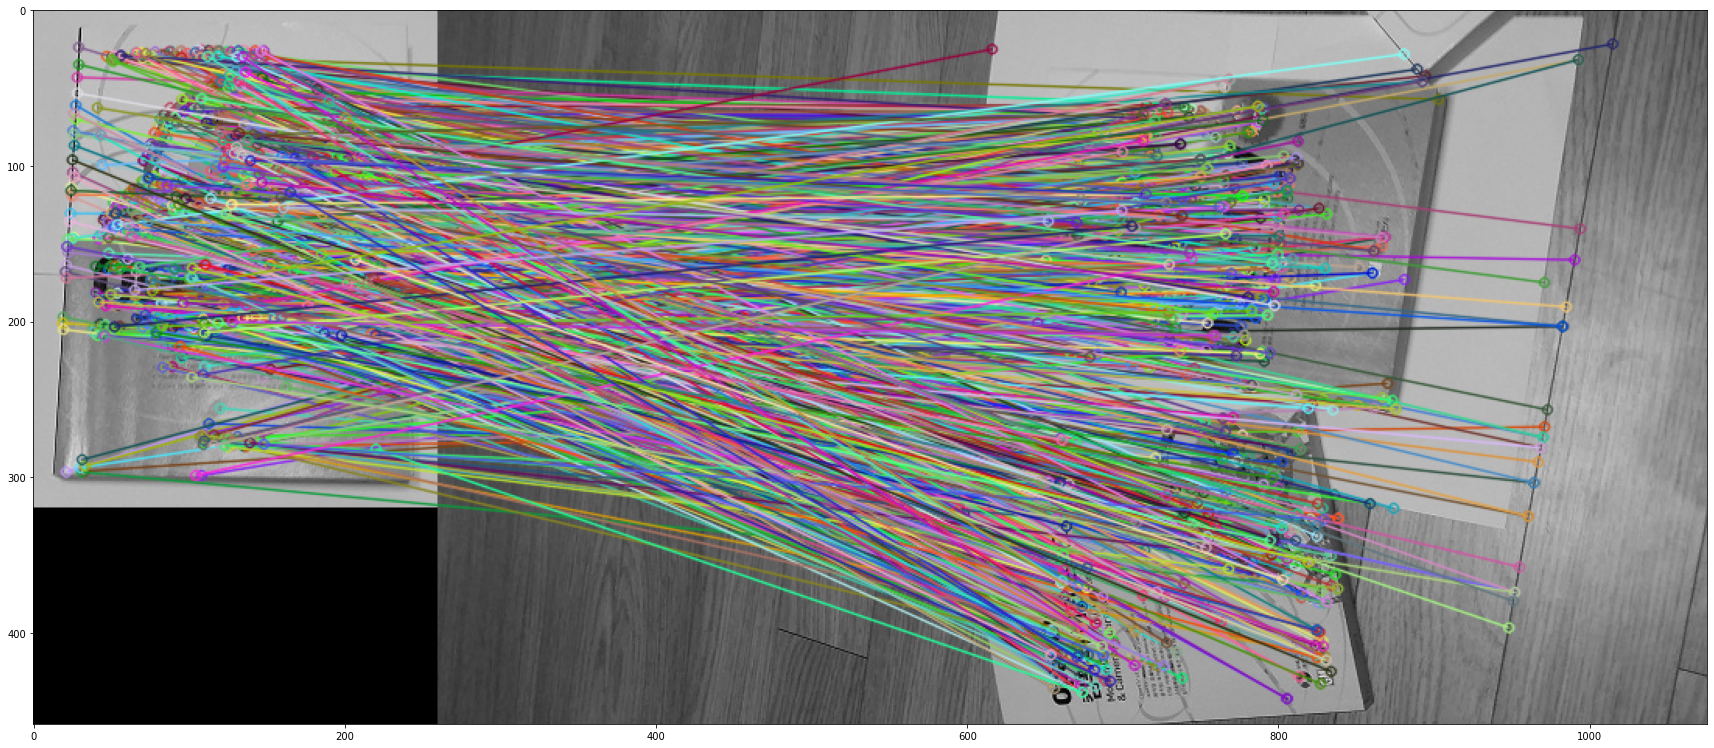

In [7]:
# 1. descriptor
orb = cv2.ORB_create(nfeatures=1000)
brisk = cv2.BRISK_create()
detector = [orb, brisk]

didx = 1
kp1, des1 = detector[didx].detectAndCompute(img1, None)
kp2, des2 = detector[didx].detectAndCompute(img2, None)

# 2. matcher
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
flann = cv2.FlannBasedMatcher_create()
matcher = [bf, flann]

midx = 1
try:
    matches = matcher[midx].match(des1, des2)
except:
    matches = matcher[midx].match(np.float32(des1), np.float32(des2))
    
# result display
matches = sorted(matches, key = lambda x:x.distance)
print('len(matches)=', len(matches))
for i, m in enumerate(matches[:10]):
    print('matches[{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(i, m.queryIdx, m.trainIdx, m.distance))
    
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2) 
plt.figure(figsize=(30, 60))
plt.imshow(img3)
plt.show()

len(good_matches)= 5


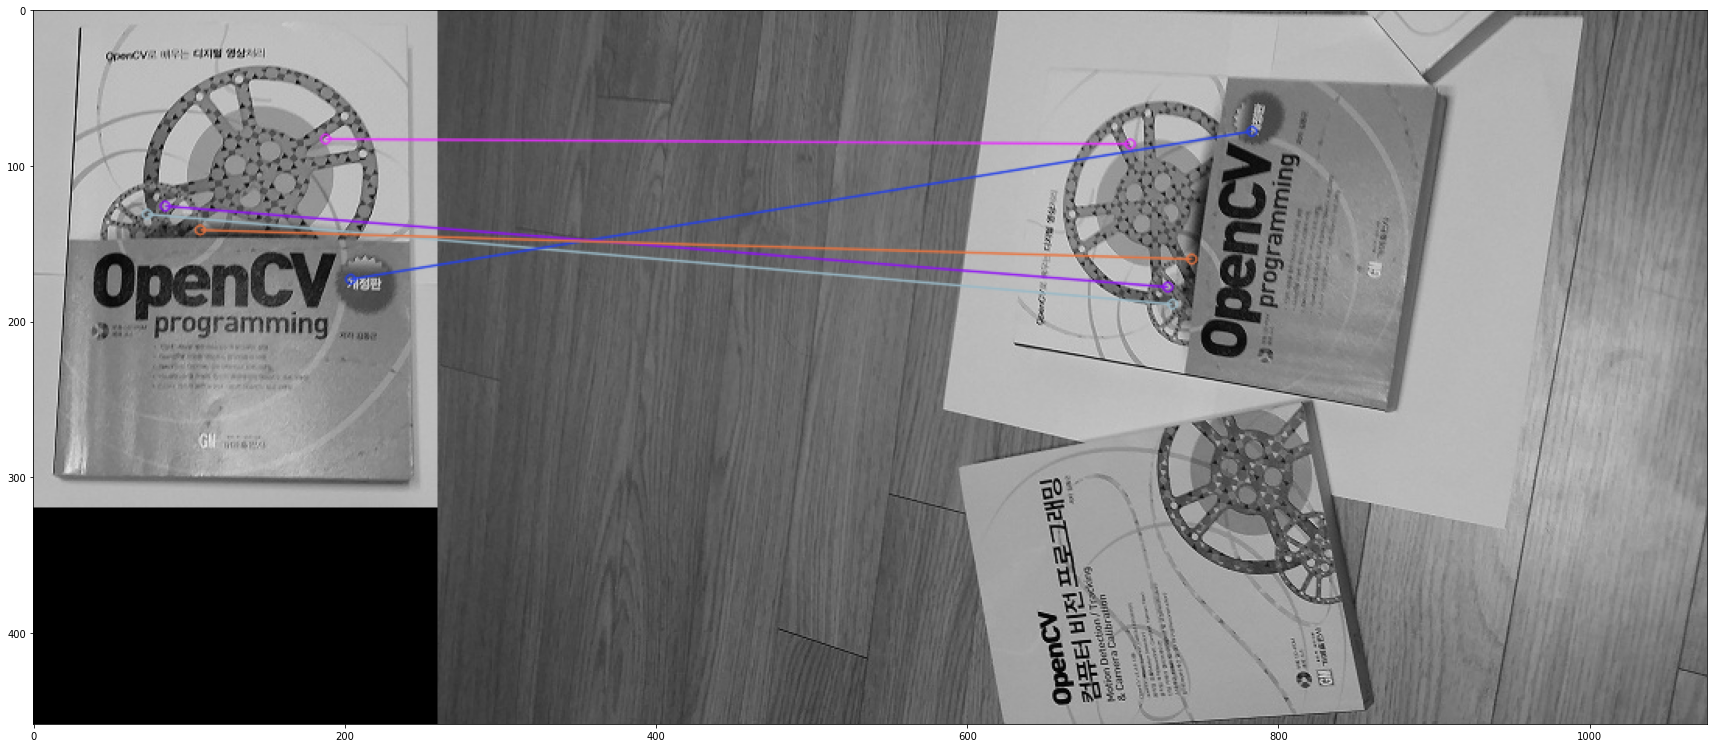

In [9]:
# draw only good matching
minDist = matches[0].distance
good_matches = list(filter(lambda m:m.distance<=2*minDist, matches))
print("len(good_matches)=", len(good_matches))
if len(good_matches) < 5:
    print('sorry, too small good matches')
    exit()
    
img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.figure(figsize=(30, 60))
plt.imshow(img4)
plt.show()